Dataset Head:
   post_id comment_id comment_parent_id         author  \
0  1gu48mp    lxr0elz               NaN  AutoModerator   
1  1gu48mp    lxr1piz               NaN  AnonHondaBoiz   
2  1gu48mp    lxr8ih9           lxr1piz       TruShot5   
3  1gu48mp    lxr967g           lxr8ih9       MatrixF6   
4  1gu48mp    lxrb8c4           lxr967g     supaphly42   

                                         raw_comment  karma  awards  
0  \nAs a reminder, this subreddit [is for civil ...      1       0  
1  It’s okay because “he wouldn’t go after the fa...  10050       0  
2  A right voting friend of ours - His immigrant ...   4335       0  
3  Also, they are looking to “deanturalize” (revo...   2719       0  
4                             Like Melania and Elon?   1525       0  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9351 entries, 0 to 9350
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0

<ipython-input-10-fcd4486e23cb>:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=data, palette='viridis')


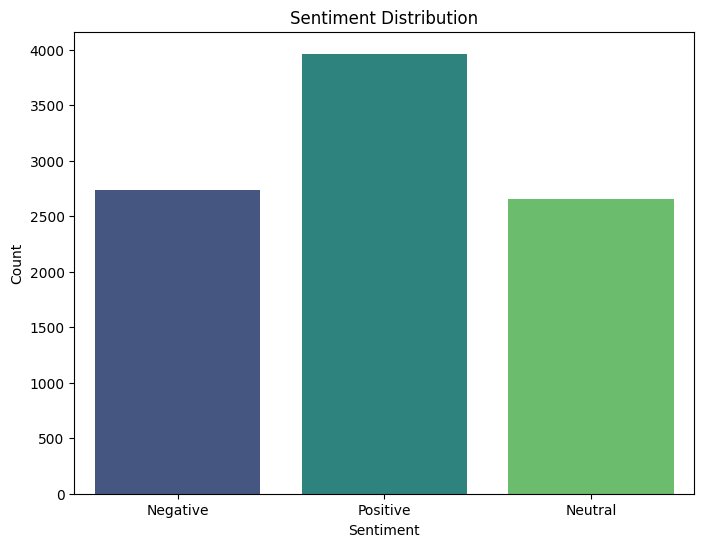

<ipython-input-10-fcd4486e23cb>:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Sentiment', y='karma', data=data, palette='coolwarm')


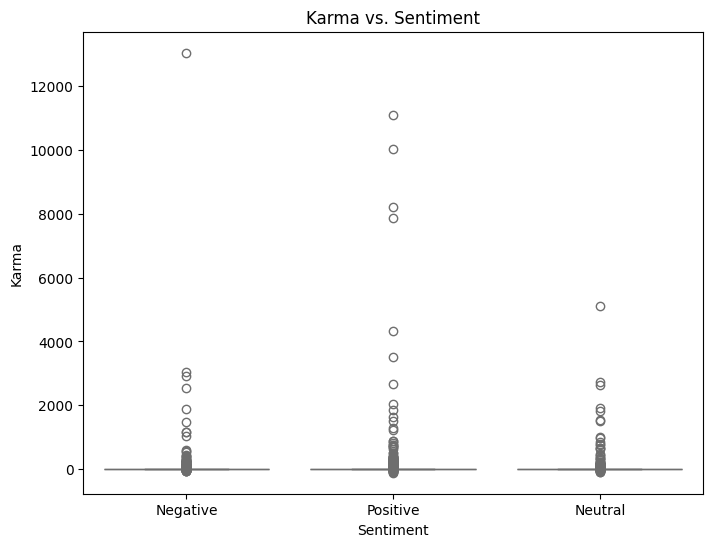

<ipython-input-10-fcd4486e23cb>:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Sentiment', y='awards', data=data, palette='Set2')


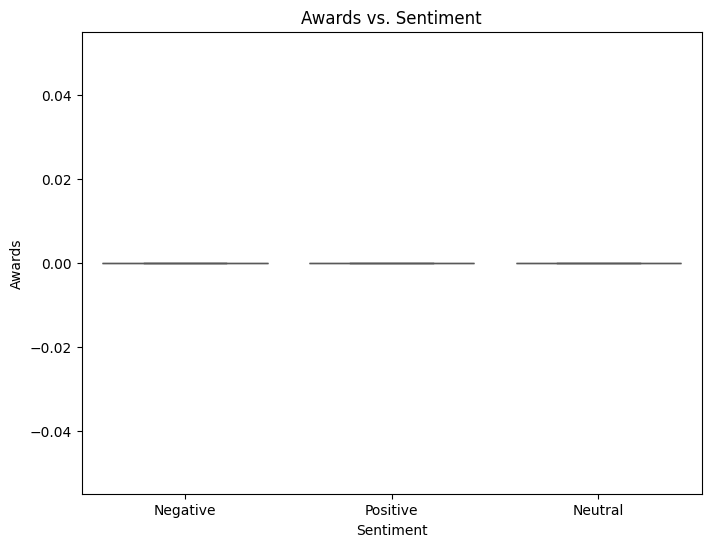

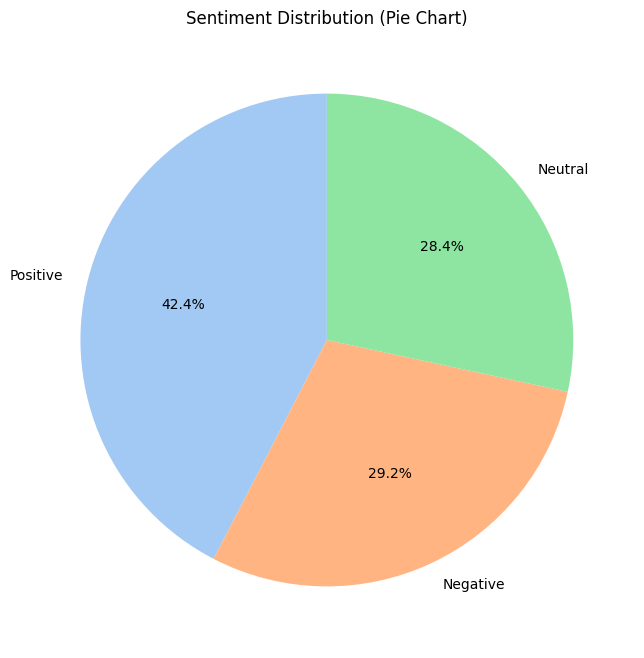

<ipython-input-10-fcd4486e23cb>:86: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Sentiment', y='karma', data=data, estimator=np.mean, ci=None, palette='viridis')
<ipython-input-10-fcd4486e23cb>:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sentiment', y='karma', data=data, estimator=np.mean, ci=None, palette='viridis')


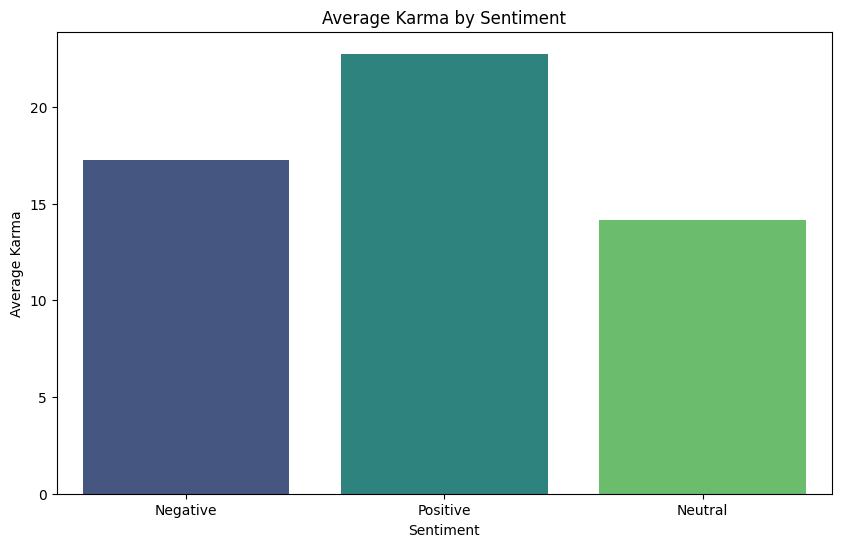

<ipython-input-10-fcd4486e23cb>:94: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Sentiment', y='awards', data=data, estimator=np.mean, ci=None, palette='magma')
<ipython-input-10-fcd4486e23cb>:94: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sentiment', y='awards', data=data, estimator=np.mean, ci=None, palette='magma')


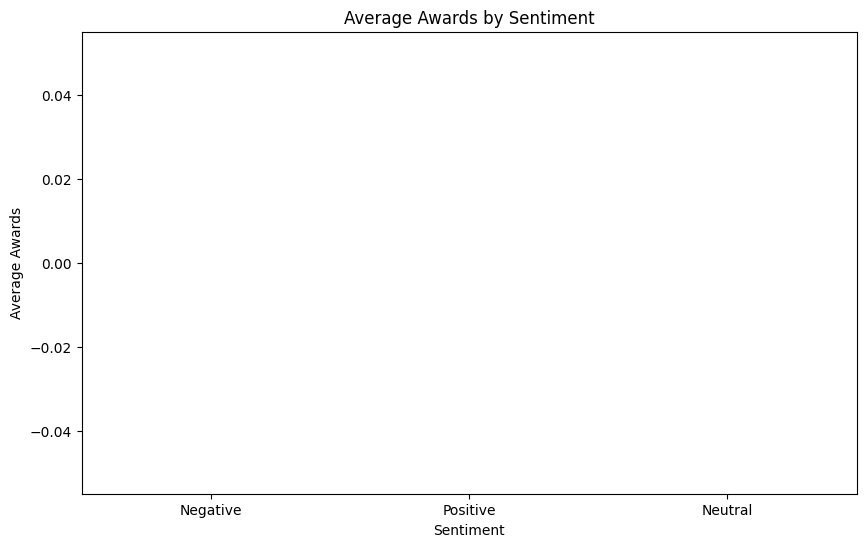


Sentiment Counts:
Sentiment
Positive    3965
Negative    2733
Neutral     2653
Name: count, dtype: int64

Summary Statistics for Karma:
            count       mean         std    min  25%  50%  75%      max
Sentiment                                                              
Negative   2733.0  17.276985  274.861611  -69.0  1.0  2.0  4.0  13054.0
Neutral    2653.0  14.143611  148.354743  -97.0  1.0  1.0  3.0   5099.0
Positive   3965.0  22.747037  323.459187 -115.0  1.0  2.0  4.0  11098.0

Summary Statistics for Awards:
            count  mean  std  min  25%  50%  75%  max
Sentiment                                            
Negative   2733.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
Neutral    2653.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
Positive   3965.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob

# Step 1: Load the dataset
# Make sure you upload the 'reddit_comments.csv' file to your Colab environment
# or change the data_path to the correct location.
data_path = '/content/reddit_comments.csv'
data = pd.read_csv(data_path)

# Step 2: Initial Exploration
print("Dataset Head:")
print(data.head())

print("\nDataset Info:")
data.info()

# Step 3: Cleaning the Data
# Check for null values in the 'raw_comment' column.
print("\nNull Values:")
print(data.isnull().sum())

# Drop rows where 'raw_comment' is null and reset the index
data.dropna(subset=['raw_comment'], inplace=True)
data.reset_index(drop=True, inplace=True)

# Remove URLs, special characters, and extra whitespace from the comments.
data['cleaned_comment'] = data['raw_comment'].str.replace(r'http\S+', '', regex=True)
data['cleaned_comment'] = data['cleaned_comment'].str.replace(r'[^A-Za-z0-9 ]+', '', regex=True)
data['cleaned_comment'] = data['cleaned_comment'].str.strip()


# Step 4: Sentiment Analysis
def get_sentiment(text):
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the sentiment analysis function to the cleaned comments.
data['Sentiment'] = data['cleaned_comment'].apply(get_sentiment)


# Step 5: Visualizations

# Sentiment Distribution (Countplot)
plt.figure(figsize=(8, 6))
sns.countplot(x='Sentiment', data=data, palette='viridis')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Karma vs. Sentiment (Boxplot)
plt.figure(figsize=(8, 6))
sns.boxplot(x='Sentiment', y='karma', data=data, palette='coolwarm')
plt.title('Karma vs. Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Karma')
plt.show()


# Awards vs. Sentiment (Boxplot)
plt.figure(figsize=(8, 6))
sns.boxplot(x='Sentiment', y='awards', data=data, palette='Set2')
plt.title('Awards vs. Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Awards')
plt.show()

# Sentiment Distribution (Pie Chart)
sentiment_counts = data['Sentiment'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Sentiment Distribution (Pie Chart)')
plt.show()

# Average Karma by Sentiment (Bar Chart)
plt.figure(figsize=(10, 6))
sns.barplot(x='Sentiment', y='karma', data=data, estimator=np.mean, ci=None, palette='viridis')
plt.title('Average Karma by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Average Karma')
plt.show()

# Average Awards by Sentiment (Bar Chart)
plt.figure(figsize=(10, 6))
sns.barplot(x='Sentiment', y='awards', data=data, estimator=np.mean, ci=None, palette='magma')
plt.title('Average Awards by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Average Awards')
plt.show()


# Step 6: Summary Statistics
print("\nSentiment Counts:")
print(data['Sentiment'].value_counts())

print("\nSummary Statistics for Karma:")
print(data.groupby('Sentiment')['karma'].describe())

print("\nSummary Statistics for Awards:")
print(data.groupby('Sentiment')['awards'].describe())

# Step 7: Save Processed Data (Optional)
processed_data_path = '/content/processed_reddit_data.csv'
data.to_csv(processed_data_path, index=False)
# print(f"Processed data saved to {processed_data_path}")